In [2]:
import pandas as pd

# 该数据集包含了5个属性：
# & Sepal.Length（花萼长度），单位是cm;
# & Sepal.Width（花萼宽度），单位是cm;
# & Petal.Length（花瓣长度），单位是cm;
# & Petal.Width（花瓣宽度），单位是cm;
# & 种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。
iris_df = pd.read_csv("./data/iris.data.txt", delimiter=',', header=None)
# 添加列名
column_names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
iris_df.columns = column_names
iris_df.info()
iris_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


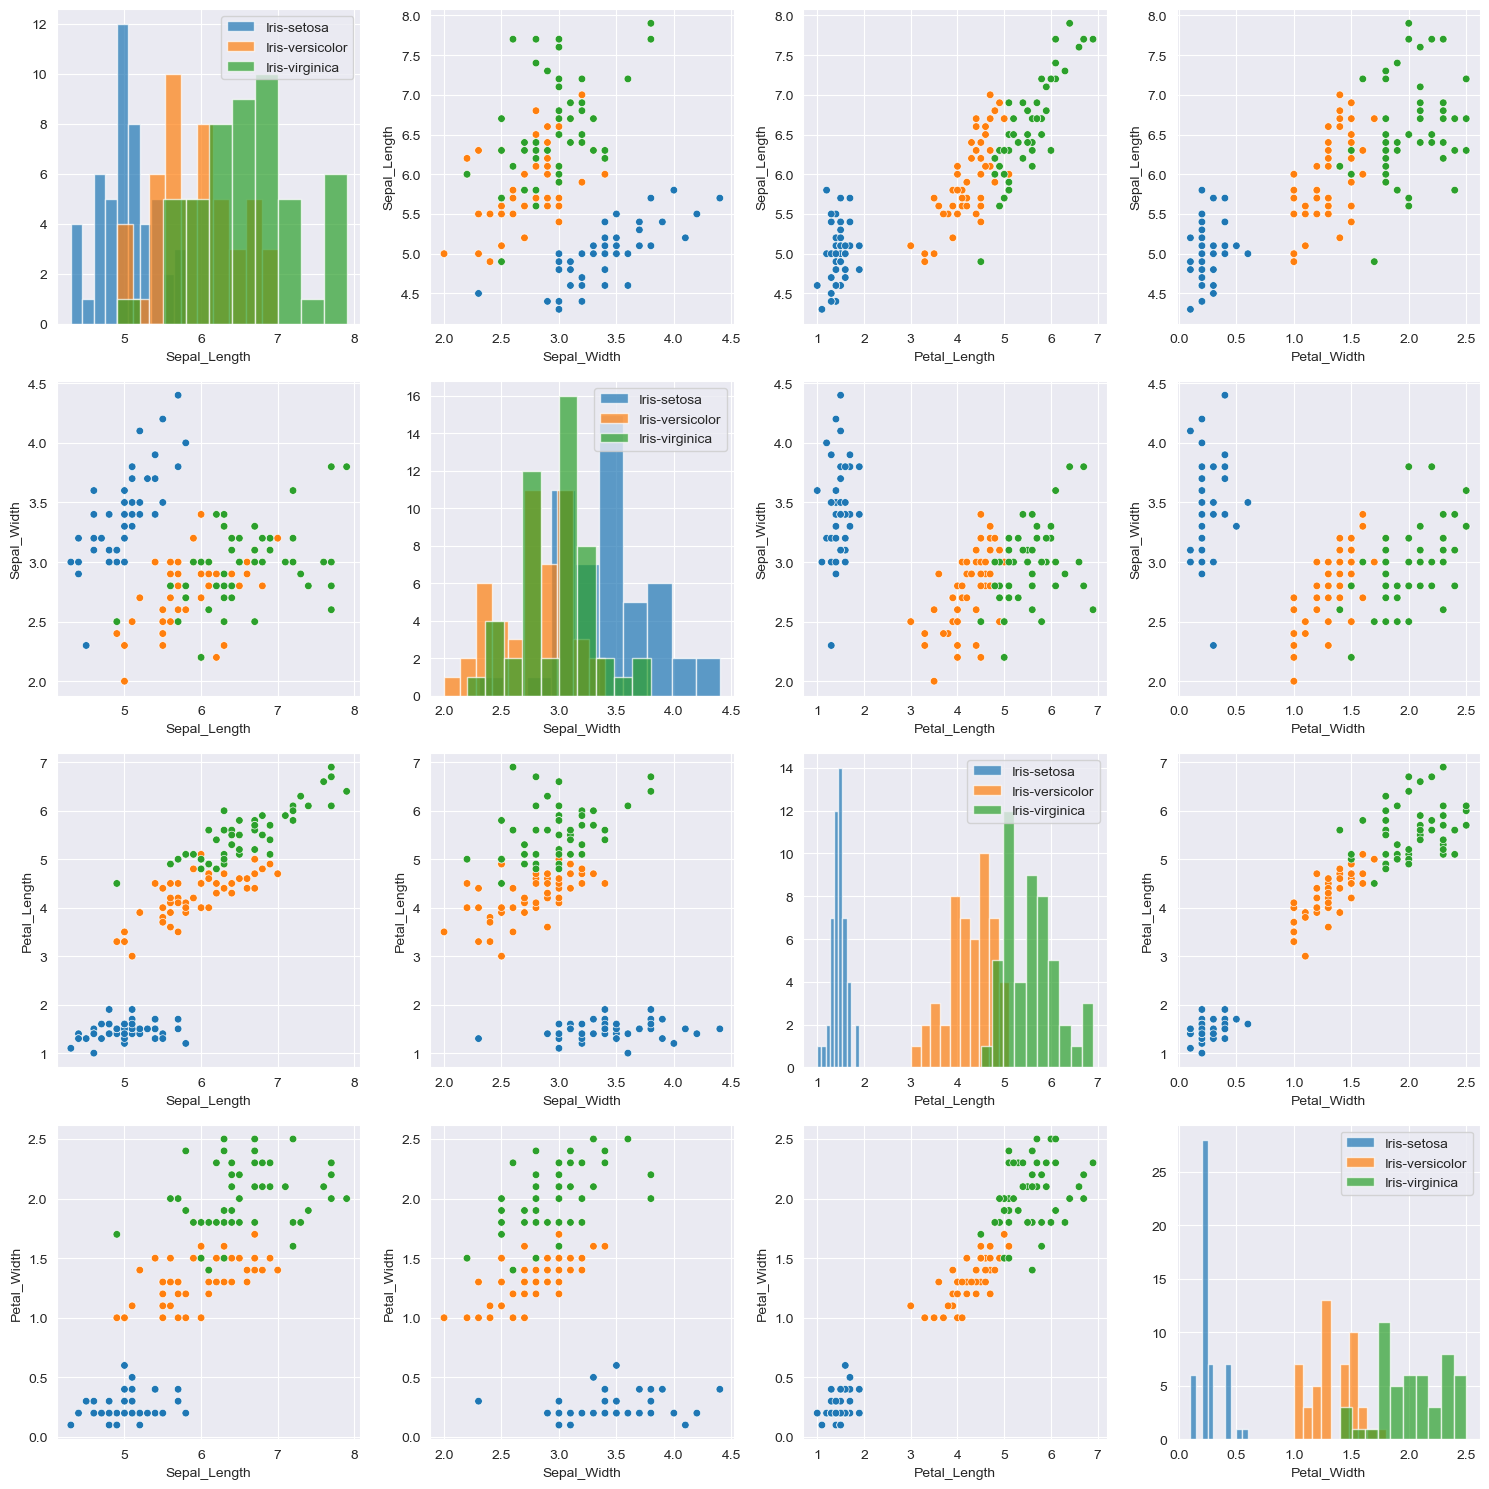

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3种类型的花样本分类

# 运行不起来？
# sns.pairplot(iris_df, hue="Species", height=1.5)
# plt.show()

# 手动复现！
variables = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
n_vars = len(variables)

fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15))

for i in range(n_vars):
    for j in range(n_vars):
        if i == j:
            # 对角线：分布图
            for species in iris_df['Species'].unique():
                data = iris_df[iris_df['Species'] == species]
                axes[i, j].hist(data[variables[i]], alpha=0.7, label=species)
            axes[i, j].set_xlabel(variables[i])
            axes[i, j].legend()
        else:
            # 非对角线：散点图
            sns.scatterplot(data=iris_df, x=variables[j], y=variables[i],
                            hue='Species', ax=axes[i, j], s=30)
            axes[i, j].legend().remove()

plt.tight_layout()
plt.show()

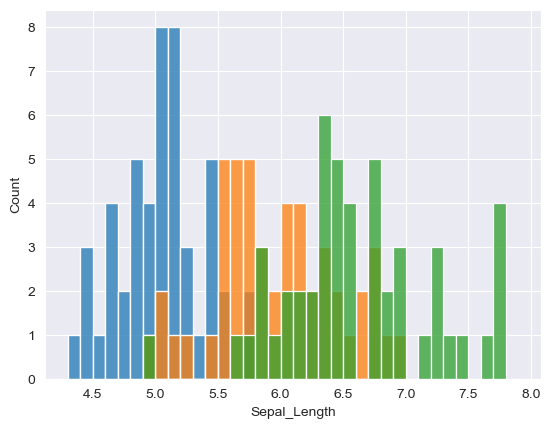

t值：-10.52098626754911 p值：8.985235037487079e-18
t值：-15.386195820079404 p值：6.892546060674059e-28
t值：-5.629165259719801 p值：1.7248563024547942e-07
p值小于显著水平0.05，三种鸢尾花萼片长度的平均值存在显著区别。


In [11]:
from scipy.stats import ttest_ind

# 检验三种鸢尾花在萼片的长度平均值的显著性差异。

iris_setosa = iris_df.query('Species == "Iris-setosa"')
iris_versicolor = iris_df.query('Species == "Iris-versicolor"')
iris_virginica = iris_df.query('Species == "Iris-virginica"')

sns.histplot(iris_setosa['Sepal_Length'], binwidth=0.1)
sns.histplot(iris_versicolor['Sepal_Length'], binwidth=0.1)
sns.histplot(iris_virginica['Sepal_Length'], binwidth=0.1)
plt.show()

# 原假设：不同花萼片长度的平均值不存在显著区别。
# 备择假设：不同花萼片长度的平均值存在显著区别。

# 只检验平均值是否存在差异，不比较哪个品种的萼片长度更长，故选择双尾检验，选择0.05作为显著水平。
# 计算t值和p值
t_stat1, p_value1 = ttest_ind(iris_setosa["Sepal_Length"], iris_versicolor["Sepal_Length"])
print(f"t值：{t_stat1}", f"p值：{p_value1}")
t_stat2, p_value2 = ttest_ind(iris_setosa["Sepal_Length"], iris_virginica['Sepal_Length'])
print(f"t值：{t_stat2}", f"p值：{p_value2}")
t_stat3, p_value3 = ttest_ind(iris_versicolor["Sepal_Length"], iris_virginica['Sepal_Length'])
print(f"t值：{t_stat3}", f"p值：{p_value3}")
if p_value1 < 0.05 and p_value2 < 0.05 and p_value3 < 0.05:
    print('p值小于显著水平0.05，三种鸢尾花萼片长度的平均值存在显著区别。')


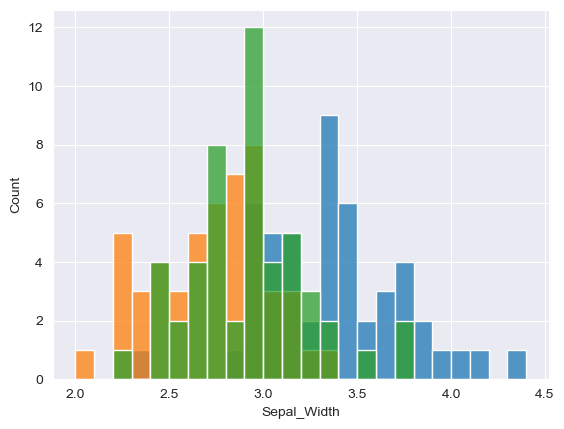

t值：9.282772555558111 p值：4.362239016010214e-15
t值：6.289384996672061 p值：8.916634067006443e-09
t值：-3.2057607502218186 p值：0.0018191004238894803
p值小于显著水平0.05，三种鸢尾花萼片宽度的平均值存在显著区别。


In [12]:
from scipy.stats import ttest_ind

# 检验三种鸢尾花在萼片的宽度平均值的显著性差异。

iris_setosa = iris_df.query('Species == "Iris-setosa"')
iris_versicolor = iris_df.query('Species == "Iris-versicolor"')
iris_virginica = iris_df.query('Species == "Iris-virginica"')

sns.histplot(iris_setosa['Sepal_Width'], binwidth=0.1)
sns.histplot(iris_versicolor['Sepal_Width'], binwidth=0.1)
sns.histplot(iris_virginica['Sepal_Width'], binwidth=0.1)
plt.show()

# 原假设：不同花萼片宽度的平均值不存在显著区别。
# 备择假设：不同花萼片宽度的平均值存在显著区别。

# 只检验平均值是否存在差异，不比较哪个品种的萼片宽度更长，故选择双尾检验，选择0.05作为显著水平。
# 计算t值和p值
t_stat1, p_value1 = ttest_ind(iris_setosa["Sepal_Width"], iris_versicolor["Sepal_Width"])
print(f"t值：{t_stat1}", f"p值：{p_value1}")
t_stat2, p_value2 = ttest_ind(iris_setosa["Sepal_Width"], iris_virginica['Sepal_Width'])
print(f"t值：{t_stat2}", f"p值：{p_value2}")
t_stat3, p_value3 = ttest_ind(iris_versicolor["Sepal_Width"], iris_virginica['Sepal_Width'])
print(f"t值：{t_stat3}", f"p值：{p_value3}")
if p_value1 < 0.05 and p_value2 < 0.05 and p_value3 < 0.05:
    print('p值小于显著水平0.05，三种鸢尾花萼片宽度的平均值存在显著区别。')


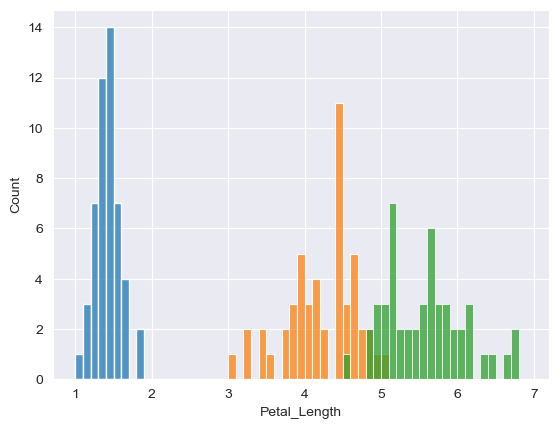

t值：-39.46866259397272 p值：5.717463758170621e-62
t值：-49.965703359355636 p值：1.5641224158883576e-71
t值：-12.603779441384985 p值：3.1788195478061495e-22
p值小于显著水平0.05，三种鸢尾花花瓣长度的平均值存在显著区别。


In [13]:
from scipy.stats import ttest_ind

# 检验三种鸢尾花花瓣的长度平均值的显著性差异。

iris_setosa = iris_df.query('Species == "Iris-setosa"')
iris_versicolor = iris_df.query('Species == "Iris-versicolor"')
iris_virginica = iris_df.query('Species == "Iris-virginica"')

sns.histplot(iris_setosa['Petal_Length'], binwidth=0.1)
sns.histplot(iris_versicolor['Petal_Length'], binwidth=0.1)
sns.histplot(iris_virginica['Petal_Length'], binwidth=0.1)
plt.show()

# 原假设：不同花瓣长度的平均值不存在显著区别。
# 备择假设：不同花瓣长度的平均值存在显著区别。

# 只检验平均值是否存在差异，不比较哪个品种的花瓣长度更长，故选择双尾检验，选择0.05作为显著水平。
# 计算t值和p值
t_stat1, p_value1 = ttest_ind(iris_setosa["Petal_Length"], iris_versicolor["Petal_Length"])
print(f"t值：{t_stat1}", f"p值：{p_value1}")
t_stat2, p_value2 = ttest_ind(iris_setosa["Petal_Length"], iris_virginica['Petal_Length'])
print(f"t值：{t_stat2}", f"p值：{p_value2}")
t_stat3, p_value3 = ttest_ind(iris_versicolor["Petal_Length"], iris_virginica['Petal_Length'])
print(f"t值：{t_stat3}", f"p值：{p_value3}")
if p_value1 < 0.05 and p_value2 < 0.05 and p_value3 < 0.05:
    print('p值小于显著水平0.05，三种鸢尾花花瓣长度的平均值存在显著区别。')


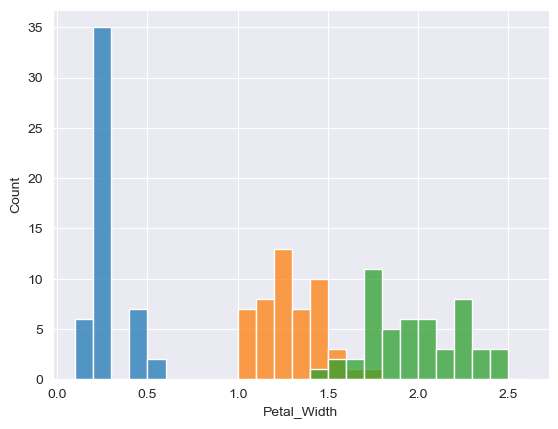

t值：-34.01237858829048 p值：4.589080615710866e-56
t值：-42.738229672411165 p值：3.582719502316063e-65
t值：-14.625367047410148 p值：2.2304090710248333e-26
p值小于显著水平0.05，三种鸢尾花花瓣片宽度的平均值存在显著区别。


In [14]:
from scipy.stats import ttest_ind

# 检验三种鸢尾花在花瓣的宽度平均值的显著性差异。

iris_setosa = iris_df.query('Species == "Iris-setosa"')
iris_versicolor = iris_df.query('Species == "Iris-versicolor"')
iris_virginica = iris_df.query('Species == "Iris-virginica"')

sns.histplot(iris_setosa['Petal_Width'], binwidth=0.1)
sns.histplot(iris_versicolor['Petal_Width'], binwidth=0.1)
sns.histplot(iris_virginica['Petal_Width'], binwidth=0.1)
plt.show()

# 原假设：不同花瓣宽度的平均值不存在显著区别。
# 备择假设：不同花瓣宽度的平均值存在显著区别。

# 只检验平均值是否存在差异，不比较哪个品种的花瓣宽度更长，故选择双尾检验，选择0.05作为显著水平。
# 计算t值和p值
t_stat1, p_value1 = ttest_ind(iris_setosa["Petal_Width"], iris_versicolor["Petal_Width"])
print(f"t值：{t_stat1}", f"p值：{p_value1}")
t_stat2, p_value2 = ttest_ind(iris_setosa["Petal_Width"], iris_virginica['Petal_Width'])
print(f"t值：{t_stat2}", f"p值：{p_value2}")
t_stat3, p_value3 = ttest_ind(iris_versicolor["Petal_Width"], iris_virginica['Petal_Width'])
print(f"t值：{t_stat3}", f"p值：{p_value3}")
if p_value1 < 0.05 and p_value2 < 0.05 and p_value3 < 0.05:
    print('p值小于显著水平0.05，三种鸢尾花花瓣片宽度的平均值存在显著区别。')


### 通过以上分析过程和结果，得知三种鸢尾花的萼片、花瓣的长度和宽度平均值，均存在显著性的差异。